In [1]:
import numpy as np
from numpy.linalg import inv
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
import random
from statsmodels.tsa.stattools import grangercausalitytests


In [2]:
m1 = [1,1]
m2 = [7, 7]
cov1 = [[3, 2], [2, 3]]
cov2 = [[2, -1], [-1, 2]]

x = np.random.multivariate_normal(m1, cov1, size=(200,))
y = np.random.multivariate_normal(m2, cov2, size=(200,))
d = np.concatenate((x, y), axis = 0)


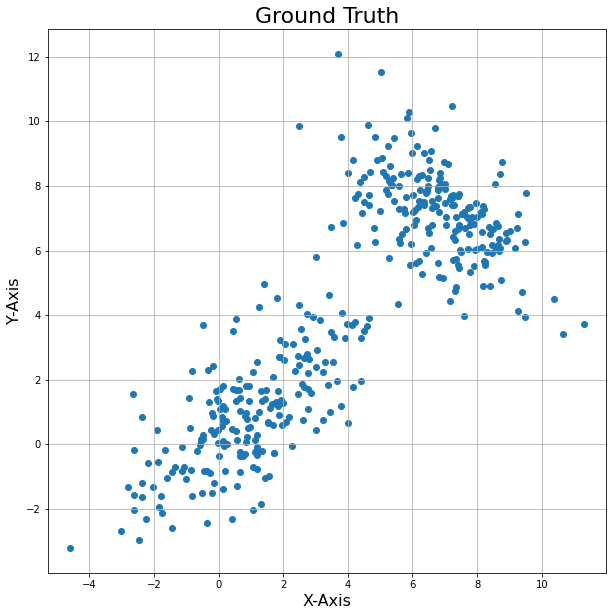

In [3]:
plt.figure(figsize=(10,10))
plt.scatter(d[:,0], d[:,1], marker='o')
plt.axis('equal')
plt.xlabel('X-Axis', fontsize=16)
plt.ylabel('Y-Axis', fontsize=16)
plt.title('Ground Truth', fontsize=22)
plt.grid()
plt.show()

In [4]:
m1 = random.choice(d)
m2 = random.choice(d)
cov1 = np.cov(np.transpose(d))
cov2 = np.cov(np.transpose(d))
pi = 0.5

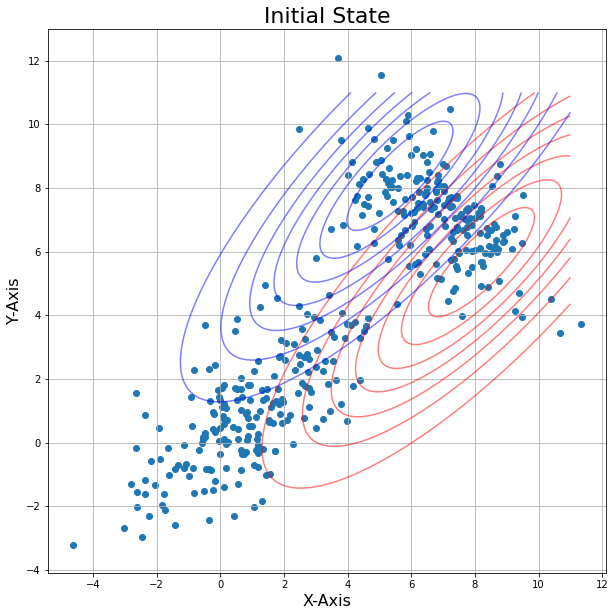

In [5]:
x1 = np.linspace(-4, 11, 200)
x2 = np.linspace(-4, 11, 200)
X, Y = np.meshgrid(x1, x2)

Z1 = multivariate_normal(m1, cov1)
Z2 = multivariate_normal(m2, cov2)

pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X; pos[:, :, 1] = Y

plt.figure(figsize=(10, 10))
plt.scatter(d[:, 0], d[:, 1], marker='o')
plt.contour(X, Y, Z1.pdf(pos), colors="r", alpha = 0.5)
plt.contour(X, Y, Z2.pdf(pos), colors="b", alpha = 0.5)
plt.axis('equal')
plt.xlabel('X-Axis', fontsize = 16)
plt.ylabel('Y-Axis', fontsize = 16)
plt.title('Initial State', fontsize = 22)
plt.grid()
plt.show()

In [6]:
def Estep(lis1):
    m1 = lis1[0]
    m2 = lis1[1]
    cov1 = lis1[2]
    cov2 = lis1[3]
    pi = lis1[4]

    pt2 = multivariate_normal.pdf(d, mean = m2, cov = cov2)
    pt1 = multivariate_normal.pdf(d, mean = m1, cov = cov1)
    w1 = pi *pt2
    w2 = (1-pi) * pt1
    eval1 = w1/(w1+w2)

    return(eval1)

In [7]:
def Mstep(eval1):
    num_mu1, din_mu1, num_mu2, din_mu2=0,0,0,0

    for i in range(0, len(d)):
      num_mu1 += (1-eval1[i]) * d[i]
      din_mu1 += (1-eval1[i])

      num_mu2 += eval1[i] * d[i]
      din_mu2 += eval1[i]

    mu1 = num_mu1/din_mu1
    mu2 = num_mu2/din_mu2

    num_s1, din_s1, num_s2, din_s2=0,0,0,0
    for i in range(0, len(d)):
      
      q1 = np.matrix(d[i] - mu1)
      num_s1 += (1-eval1[i]) * np.dot(q1.T, q1)
      din_s1 += (1-eval1[i])

      q2 = np.matrix(d[i] - mu2)
      num_s2 += eval1[i] * np.dot(q2.T, q2)
      din_s2 += eval1[i]

      s1 = num_s1/din_s1
      s2 = num_s2/din_s2

      pi = sum(eval1)/len(d)
      lis2 = [mu1, mu2, s1, s2, pi]
      return(lis2)

In [8]:
def plot(lis1):
  mu1 = lis1[0]
  mu2 = lis1[1]
  s1 = lis1[2]
  s2 = lis1[3]
  Z1 = multivariate_normal(mu1, s1)
  Z2 = multivariate_normal(mu2, s2)

  pos = np.empty(X.shape + (2,))
  pos[:, :, 0] = X; pos[:, :, 1] = Y

  plt.figure(figsize=(10,10))
  plt.scatter(d[:,0], d[:,1], marker='o')
  plt.contour(X, Y, Z1.pdf(pos), colors="r", alpha = 0.5)
  plt.contour(X, Y, Z2.pdf(pos), colors="b", alpha = 0.5)
  plt.axis('equal')
  plt.xlabel('X-Axis', fontsize=16)
  plt.ylabel('Y-Axis', fontsize=16)
  plt.grid()
  plt.show()

In [12]:
iterations = 20
lis1 = [m1,m2,cov1,cov2,pi]
for i in range(0, iterations):
  lis2 = Mstep(Estep(lis1))
  lis1 = lis2
  if(i==0 or i==4 or i==9 or i==14 or i==19):
    plot(lis1)
#Ignore the error

LinAlgError: ignored